In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0



                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━╸━━━━━━━━━━━━━━━╸━━━━   0.0 B /  ??.?MB @ 

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [5]:
import yfinance as yf

tesla_data = yf.download('TSLA')

tesla_data.reset_index(inplace=True)

print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed
        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [9]:
# URL of the webpage containing Tesla revenue data
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
# Send a GET request to the webpage
response = requests.get(url)
# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')
# Find the table containing revenue data
table = soup.find('table', class_='historical_data_table')
# Extract column headers
headers = [th.text for th in table.find('tr').find_all('th')]
# Initialize an empty list to store data rows
data_rows = []
# Loop through each row in the table, excluding the header row
for row in table.find_all('tr')[1:]:
    # Extract text from each cell in the row
    data = [td.text for td in row.find_all('td')]
    # Append the data to the list of rows
    data_rows.append(data)
# Create a DataFrame from the list of rows and column headers
tesla_revenue = pd.DataFrame(data_rows, columns=headers)
# Display the last five rows of the dataframe
print(tesla_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find'

In [10]:
import yfinance as yf

# Extract data for GameStop
gme_data = yf.download('GME')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed
        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691666  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683250  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662210   6892800


In [11]:
# URL of the webpage containing GME revenue data
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
# Send a GET request to the webpage
response = requests.get(url)
# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')
# Find the table containing revenue data
table = soup.find('table', class_='historical_data_table')
# Extract column headers
headers = [th.text for th in table.find('tr').find_all('th')]
# Initialize an empty list to store data rows
data_rows = []
# Loop through each row in the table, excluding the header row
for row in table.find_all('tr')[1:]:
    # Extract text from each cell in the row
    data = [td.text for td in row.find_all('td')]
    # Append the data to the list of rows
    data_rows.append(data)
# Create a DataFrame from the list of rows and column headers
gm
# Display the last five rows of the dataframe
print(gme_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find'

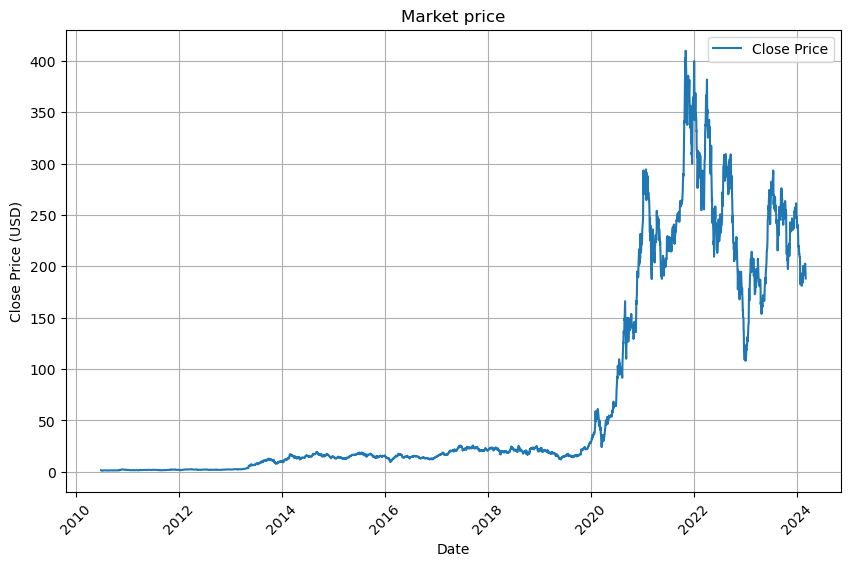

In [13]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Assuming `tesla_data` contains the stock data for Tesla
make_graph(tesla_data, title='Market price')


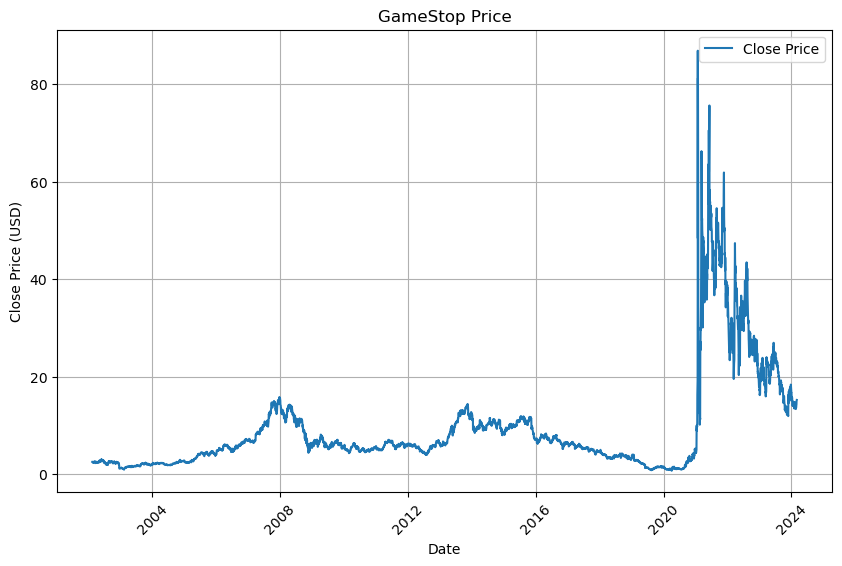

In [15]:
# Assuming `gme_data` contains the stock data for GameStop
make_graph(gme_data, title='GameStop Price')
